## Esercitazione 5  del    18 Marzo 2025


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [11]:
import numpy as np

p = 10.0**5
i = np.arange(11)
q = 10.0**(-i)
f = lambda q: -p + np.sqrt(p**2 + q)
print("q:", q)
print("f(q):", f(q))
print("spacing:", np.spacing(p**2))
fs = lambda q: q/(p + np.sqrt(p**2 + q))
print("f stabile:", fs(q))

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
1.9073486328125e-06
[5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


# Esercizio 2

Si stabilisca se il problema relativo al calcolo della funzione $f(x)= \frac  {(1+x)-1 }  {x }$ per $x= 10^{-i }$ $  i=1,2,...,20$  risulta essere ben
condizionato per tutti i valori di x assegnati; verificare sperimentalmente la stabilità numerica dell'algoritmo di valutazione

x: [1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10
 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16 1.e-17 1.e-18 1.e-19 1.e-20]
f(x): [1.         1.         1.         1.         1.         1.
 1.         0.99999999 1.00000008 1.00000008 1.00000008 1.0000889
 0.99920072 0.99920072 1.11022302 0.         0.         0.
 0.         0.        ]
spacing: 2.220446049250313e-16


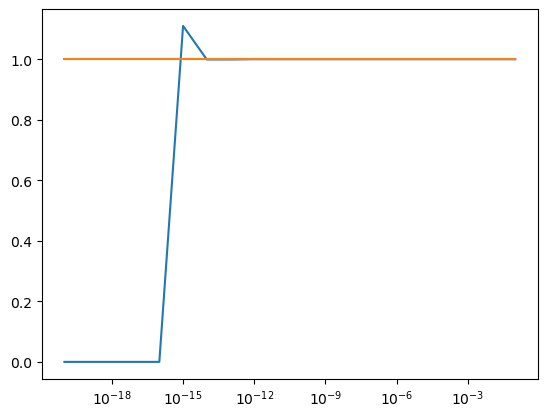

In [20]:
import matplotlib.pyplot as plt

x = 10.0**(-np.arange(1, 21))
f = lambda x: ((1 + x) - 1)/x
print("x:", x)
print("f(x):", f(x))
print("spacing:", np.spacing(1))

plt.semilogx(x, f(x), x, np.ones_like(x))
plt.show()

## Esercizio 3

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata.
- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

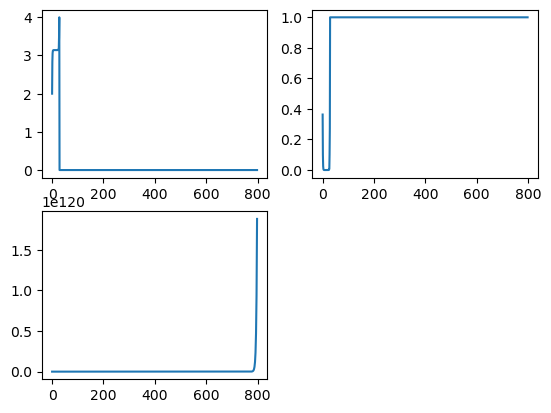

In [78]:
import math

n = 800

p = np.zeros(n)
b = np.zeros(n)
s = np.zeros(n)
p_stabile = np.zeros(n)
s_stabile = np.zeros(n)

b[0] = 2
s[0] = 1
s_stabile[0] = 1

for i in range(1, n):
    p[i] = b[i - 1]*s[i - 1]
    p_stabile[i] = b[i - 1]*s_stabile[i - 1]
    b[i] = 2*b[i - 1]
    s[i] = math.sqrt((1.0 - math.sqrt(1 - s[i - 1]**2))/2.0)
    s_stabile[i] = math.sqrt(s_stabile[i - 1]**2/(2*math.sqrt(1.0 + s_stabile[i - 1]**2)))

err_rel = lambda p: np.abs(math.pi - p)/np.abs(math.pi)

plt.subplot(2, 2, 1)
plt.plot(p[1:n])
plt.subplot(2, 2, 2)
plt.plot(err_rel(p)[1:n])
plt.subplot(2, 2, 3)
plt.plot(p_stabile[1:n])

plt.show()

## Esercizio 4   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



## Esercizio 5
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 6
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 7
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?




Si nota che al restringersi dell'intervallo in torno al punto x=2, 
in cui la funzione si annulla, si evidenzia l'instabilità dell'algoritmo 1
rispetto all' algoritmo di Horner che risulta più stabile. 
